In [3]:
# Data wrangling

import pandas as pd
import missingno as msno
import pandas_profiling as pdp

# Plotting

import matplotlib.pylab as plt
import seaborn as sns
import pandas_profiling as pdp

%matplotlib inline


In [4]:
DATA_PATH = 'data/Pokemon.csv'
sns.set(font_scale=1.5)

In [5]:
pokemon_df = pd.read_csv(DATA_PATH)

In [6]:
type_colors = [
    "#8ED752", "#F95643", "#53AFFE", "#C3D221", "#BBBDAF",
    "#AD5CA2", "#F8E64E", "#F0CA42", "#F9AEFE", "#A35449",
    "#FB61B4", "#CDBD72", "#7673DA", "#66EBFF", "#8B76FF",
    "#8E6856", "#C3C1D7", "#75A4F9"]

In [7]:
pokemon_types = pokemon_df['Type 1'].unique()

In [8]:
pokemon_colors = dict(zip(pokemon_types, type_colors))

In [10]:
pdp.ProfileReport(pokemon_df)

Number of variables,13
Number of observations,800
Total Missing (%),3.7%
Total size in memory,75.9 KiB
Average record size in memory,97.1 B
Numeric,8
Categorical,2
Boolean,1
Date,0
Text (Unique),1
Rejected,1


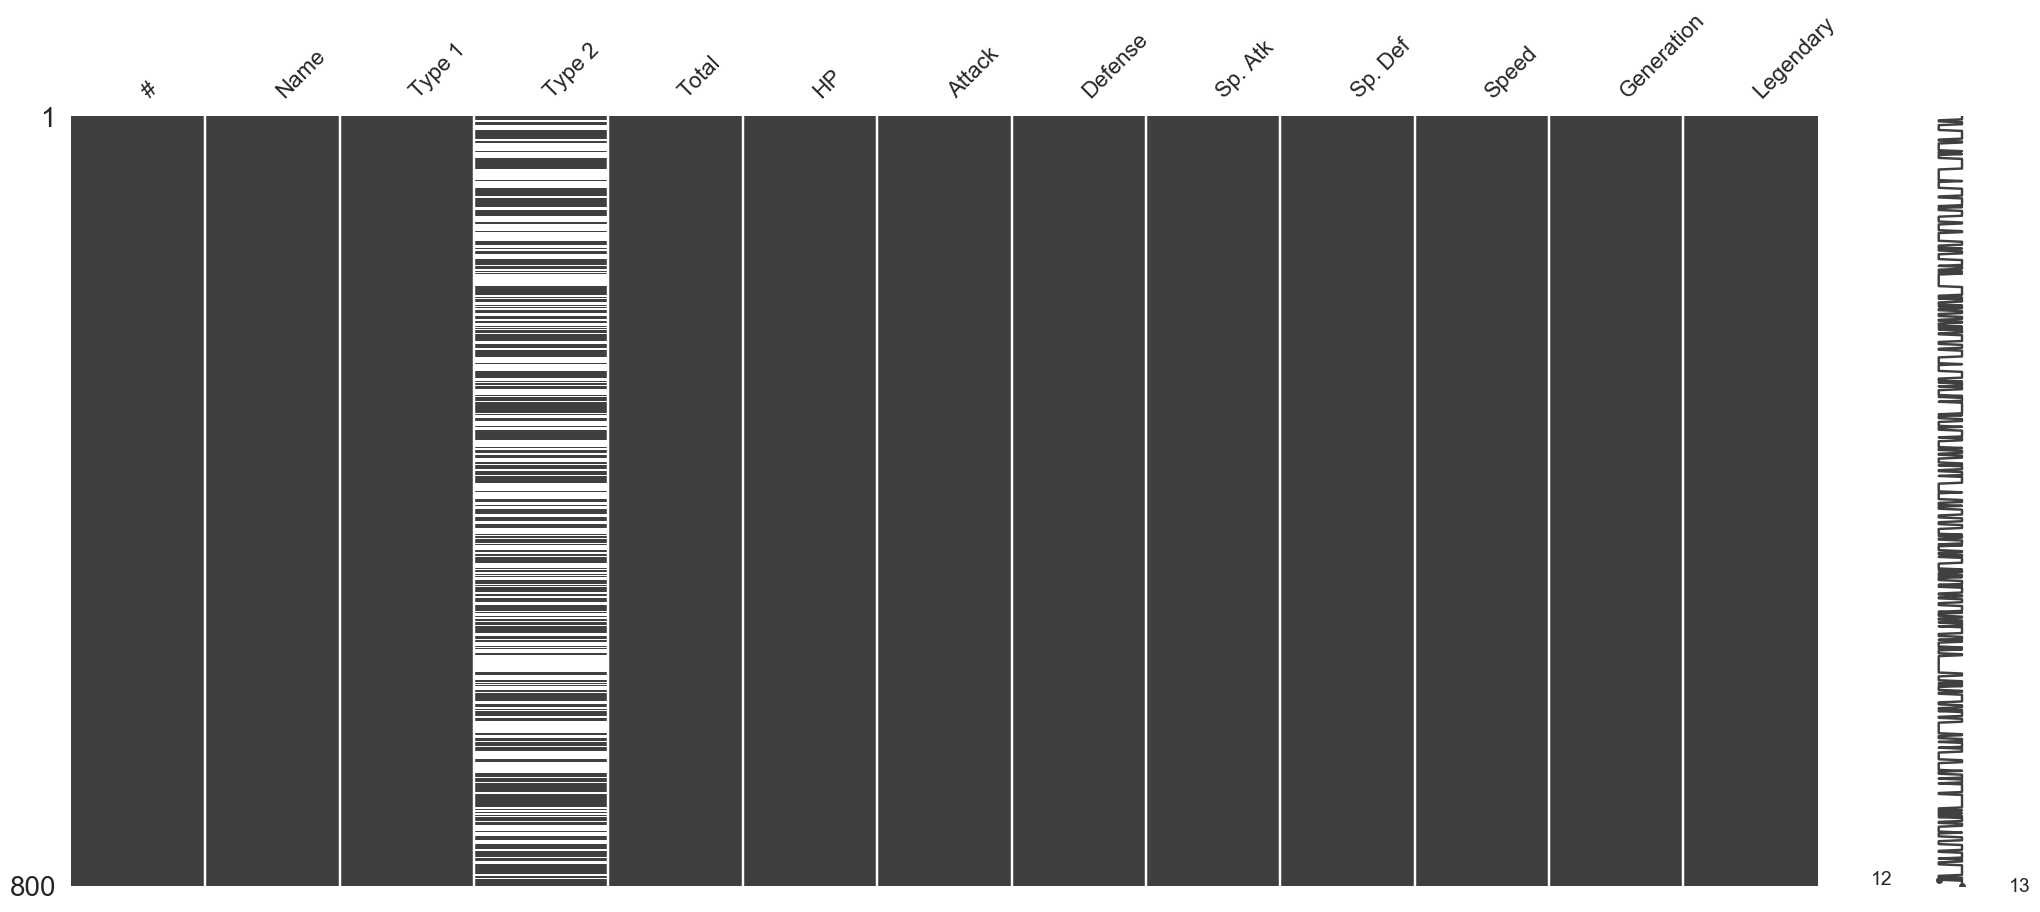

In [12]:
msno.matrix(pokemon_df)

Text(0.5, 1.05, 'Count of Pokemons per type 1')

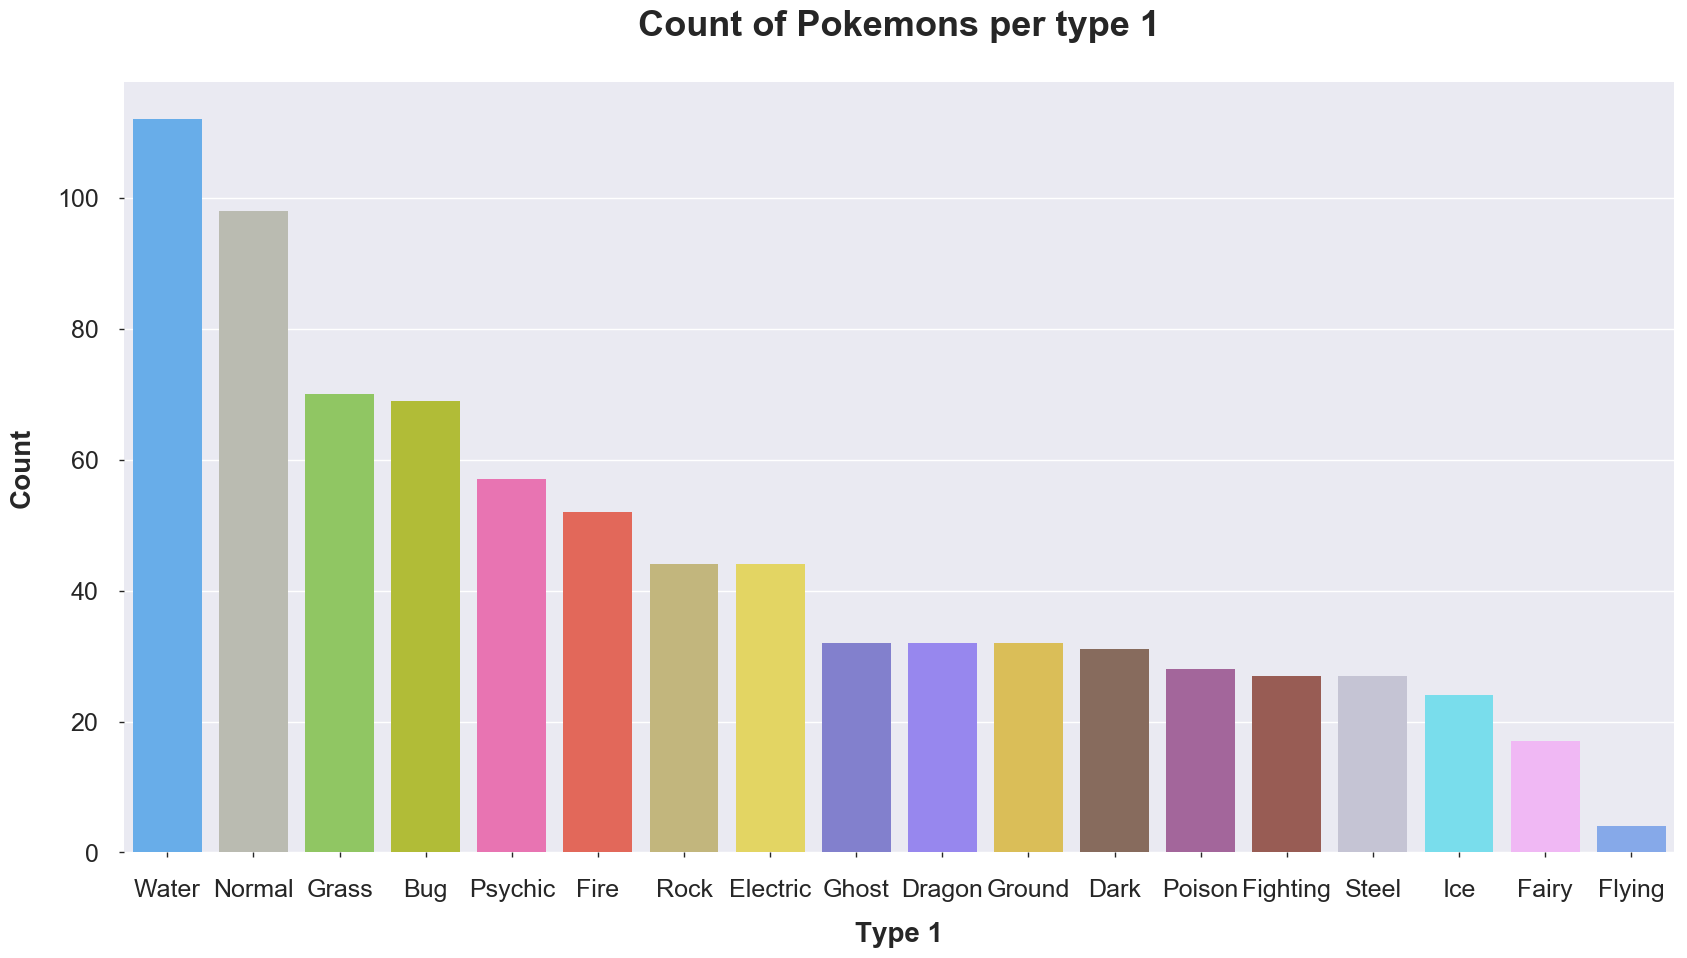

In [13]:
df = pokemon_df['Type 1'].value_counts()

fig, ax = plt.subplots(1,1,figsize=(20,10))


sns.barplot(df.index, df.values, palette=pokemon_colors, ax=ax)

ax.tick_params(labelsize=18, direction='out', pad=15)
ax.set_xlabel('Type 1', weight='bold', size='20', labelpad=15)
ax.set_ylabel('Count', weight='bold', size='20', labelpad=15)
ax.set_title('Count of Pokemons per type 1',  size='26', weight='bold', y=1.05)

Text(0.5, 1.05, 'Count of Pokemons per tuple (Type 1, Type 2)')

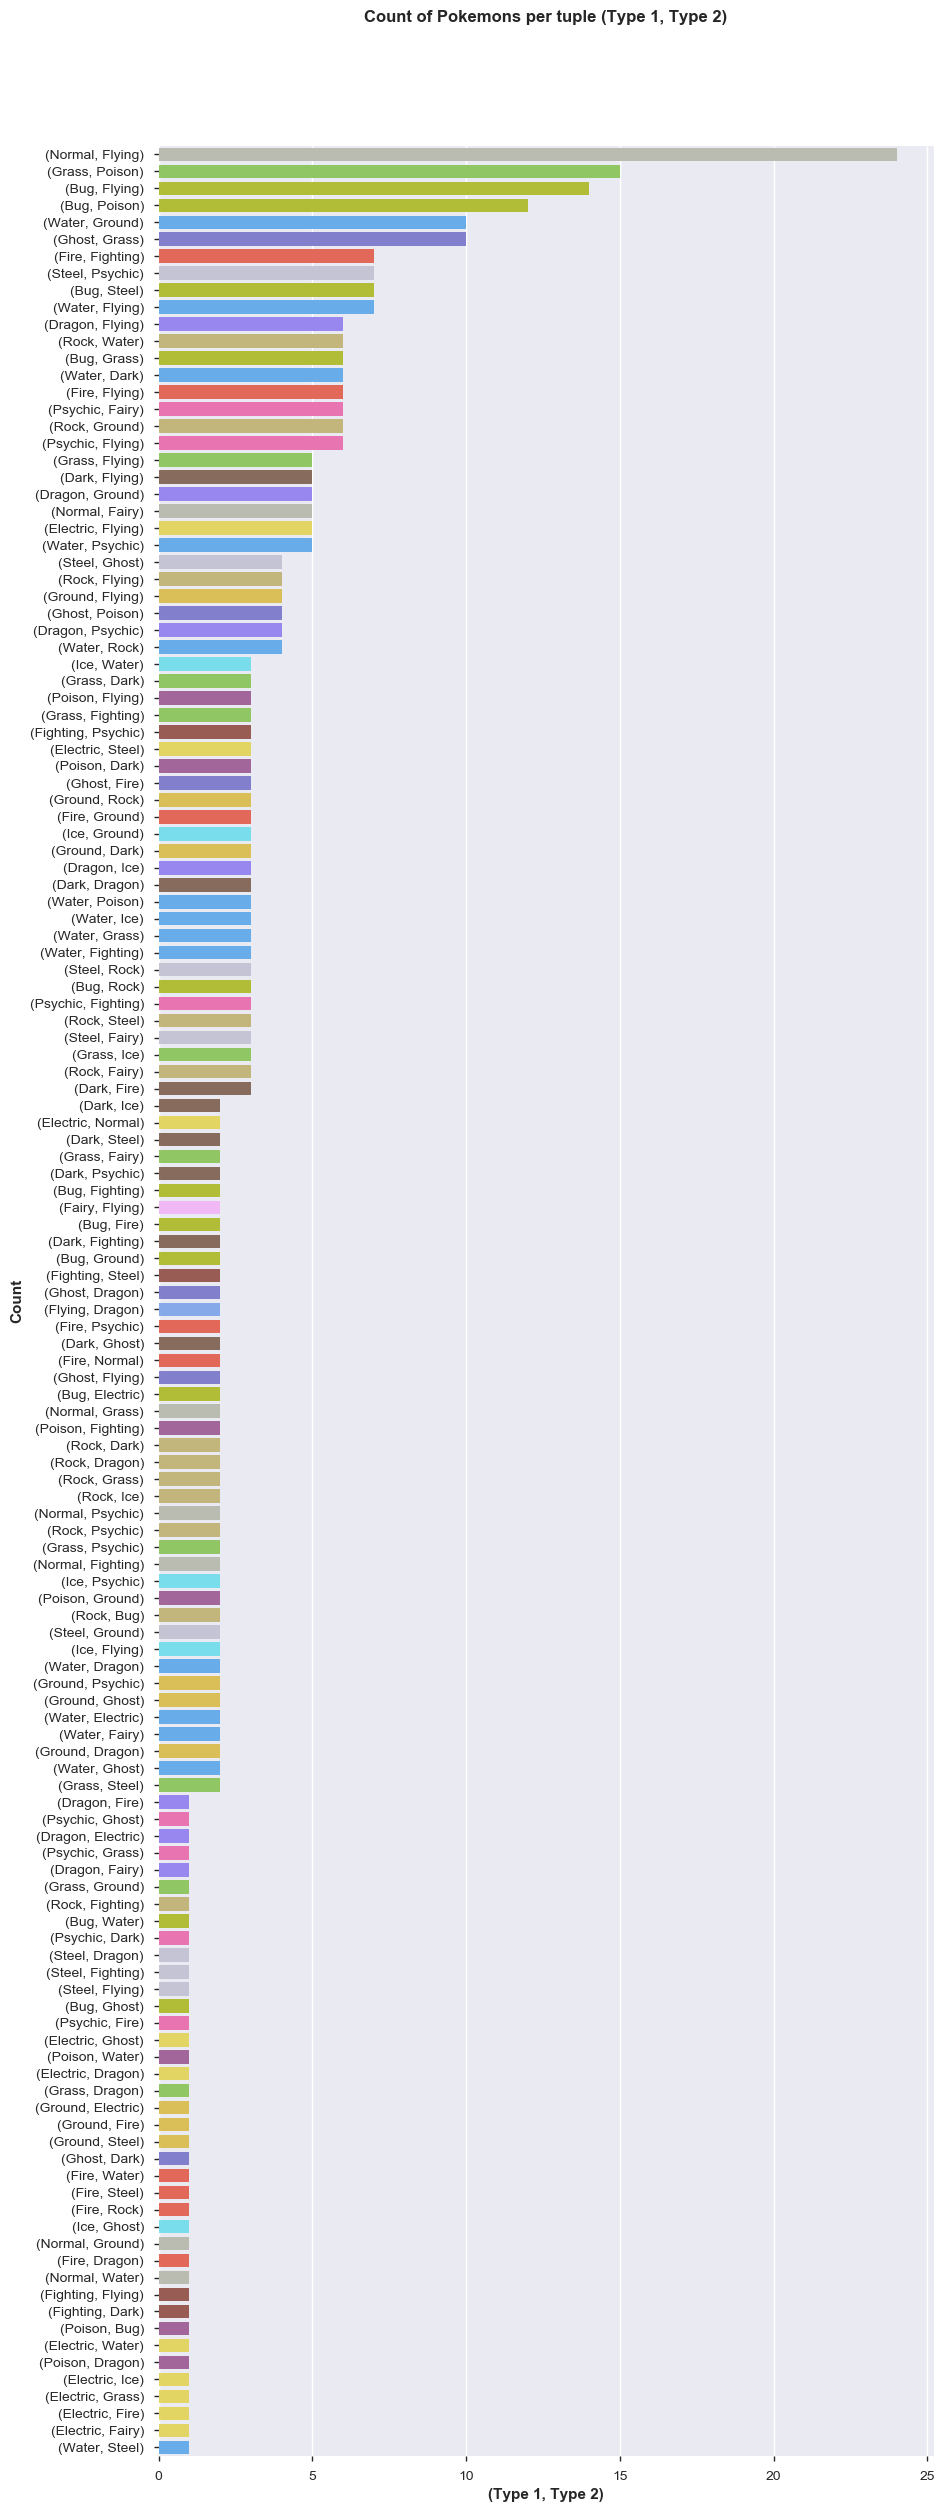

In [19]:
df = (pokemon_df.groupby(['Type 1', 'Type 2']).count()['#']
                .sort_values(ascending=False).reset_index()
                .assign(color=lambda df:df['Type 1'].map(pokemon_colors))
                .rename(columns={'#': 'count'})
                .assign(type_tuple=lambda df:'(' + df['Type 1'] + ', ' + df['Type 2'] + ')')
                .drop(['Type 1', 'Type 2'], axis=1))


pokemon_tuple_colors = pd.Series(df.color.values,index=df.type_tuple).to_dict()

fig, ax = plt.subplots(1,1,figsize=(10, 30))


sns.barplot(df['count'], df['type_tuple'], palette=pokemon_tuple_colors, 
            orient='h', 
            ax=ax)

ax.set_xlabel('(Type 1, Type 2)', weight='bold')
ax.set_ylabel('Count', weight='bold')
ax.set_title('Count of Pokemons per tuple (Type 1, Type 2)', weight='bold', y=1.05)

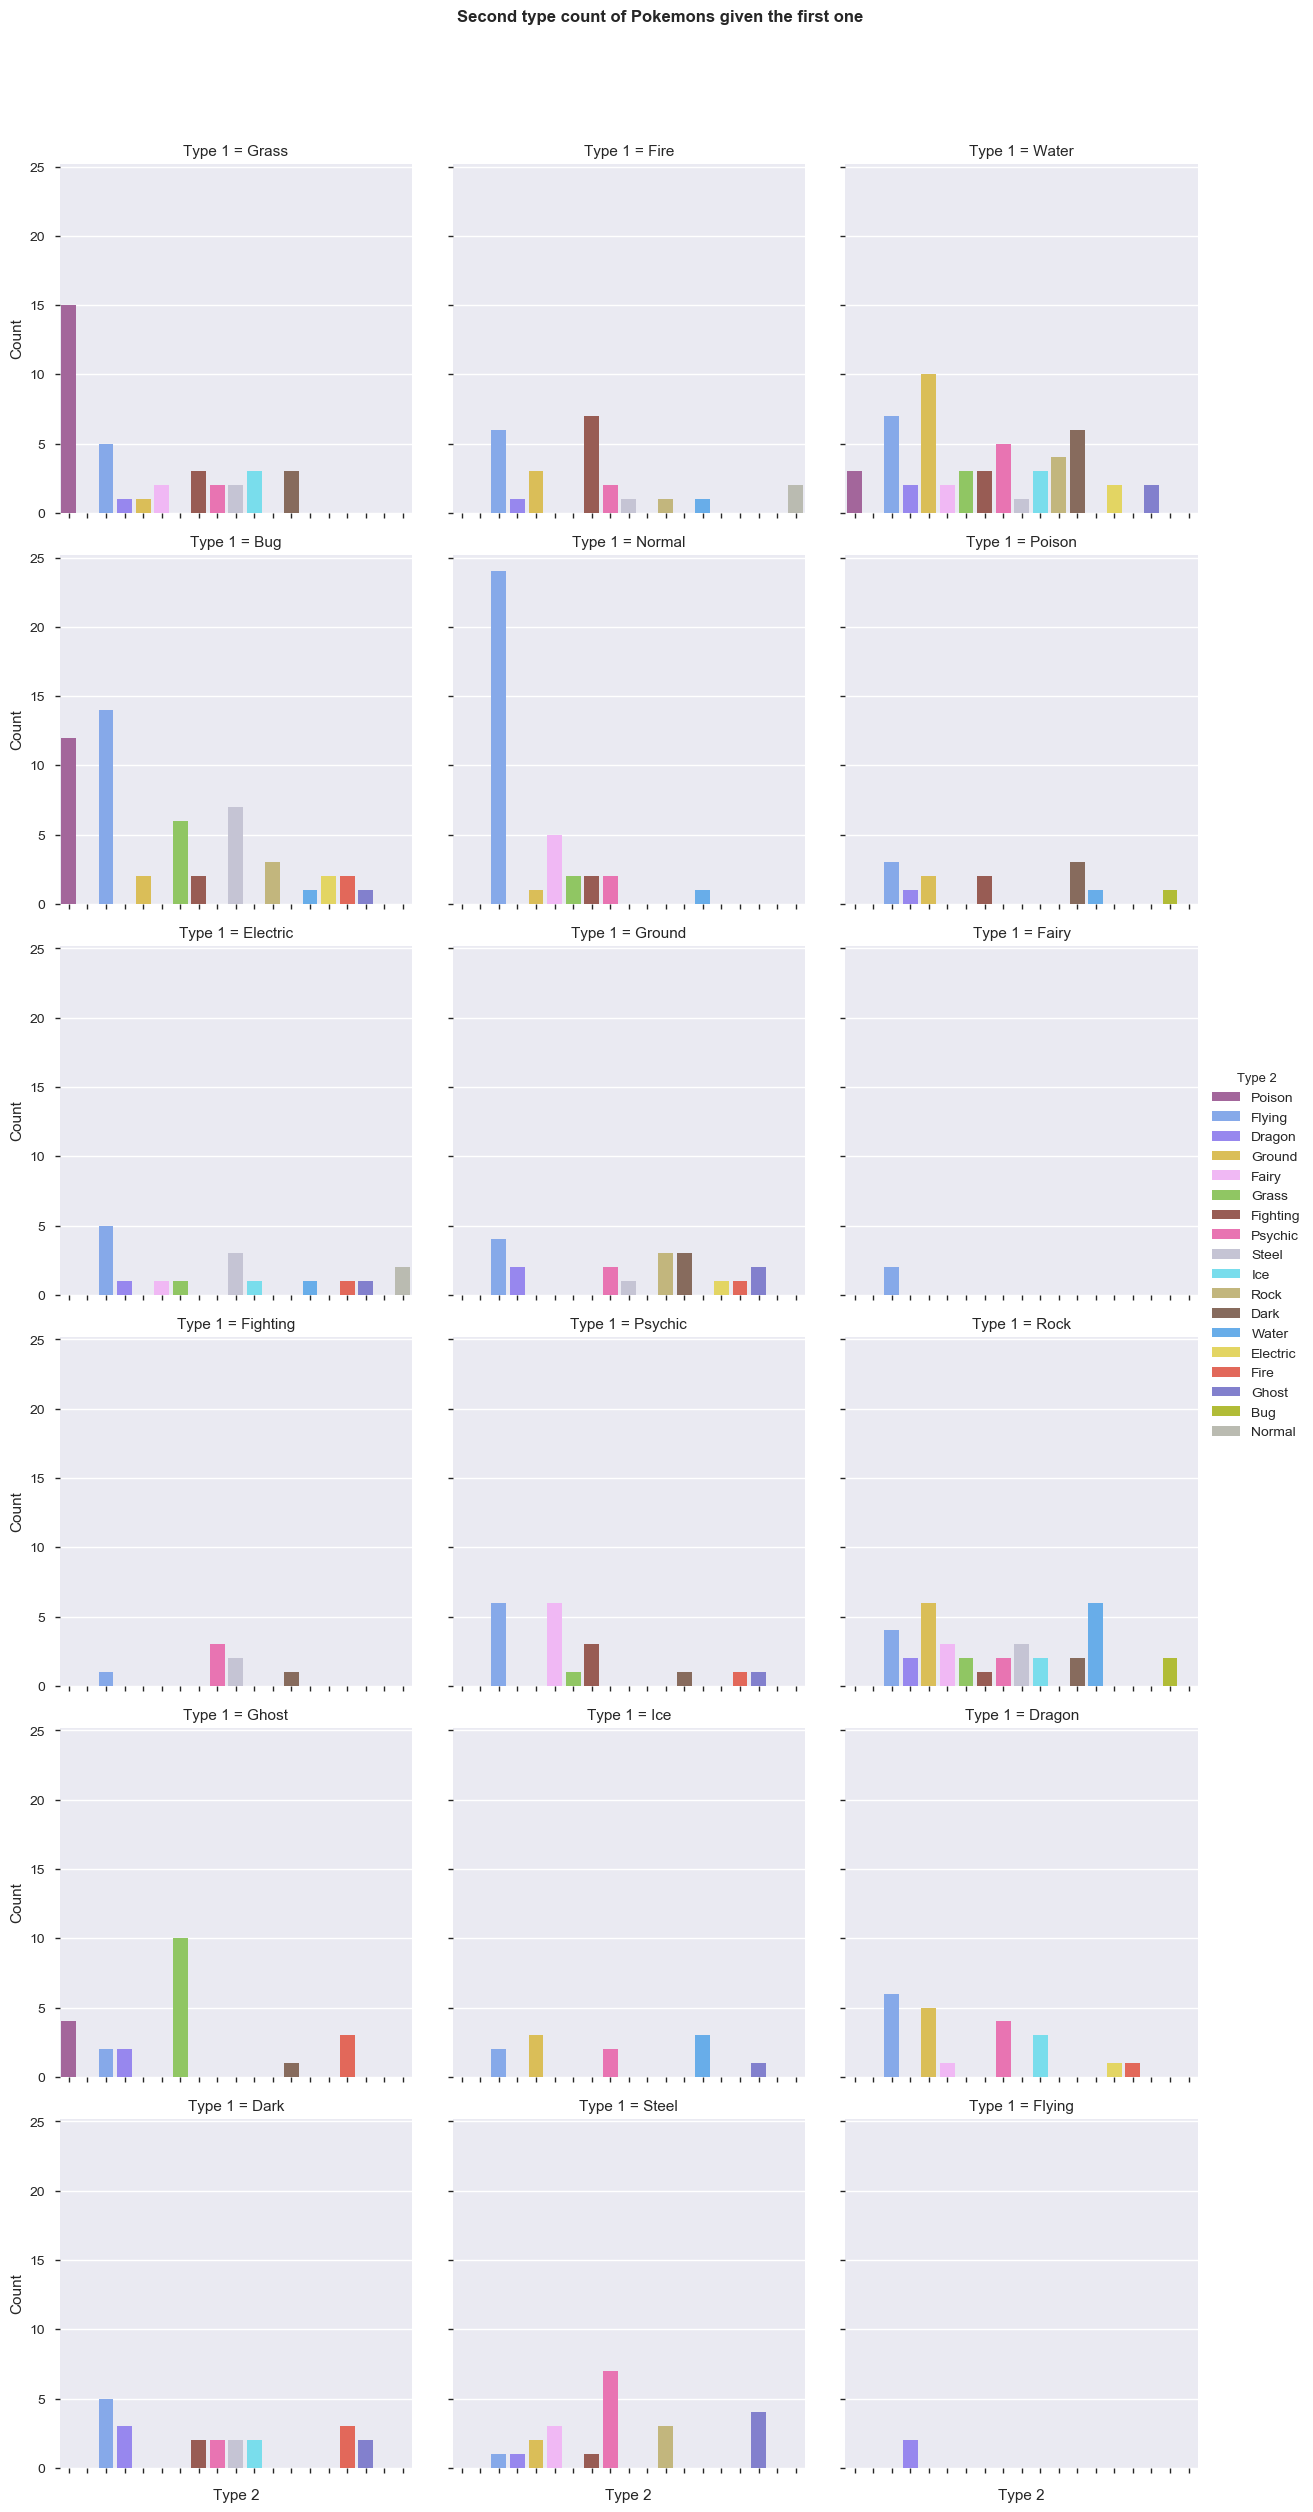

In [14]:
g = (sns.FacetGrid(pokemon_df, col='Type 1',hue='Type 2',
                   col_wrap=3, height=4,palette=pokemon_colors)
        .map(sns.countplot, 'Type 2', order=pokemon_df["Type 2"].unique())
        .set_axis_labels('Type 2', 'Count')
        .set(xticklabels=[])
        .add_legend()
        .fig
        .suptitle('Second type count of Pokemons given the first one', 
                  weight='bold', y=1.05))

In [15]:
melted_df = (pokemon_df.drop(['#', 'Total', 'Name', 'Type 2', 'Generation', 'Legendary'], axis=1)
                       .pipe(pd.melt, id_vars=['Type 1'], var_name='statistic'))

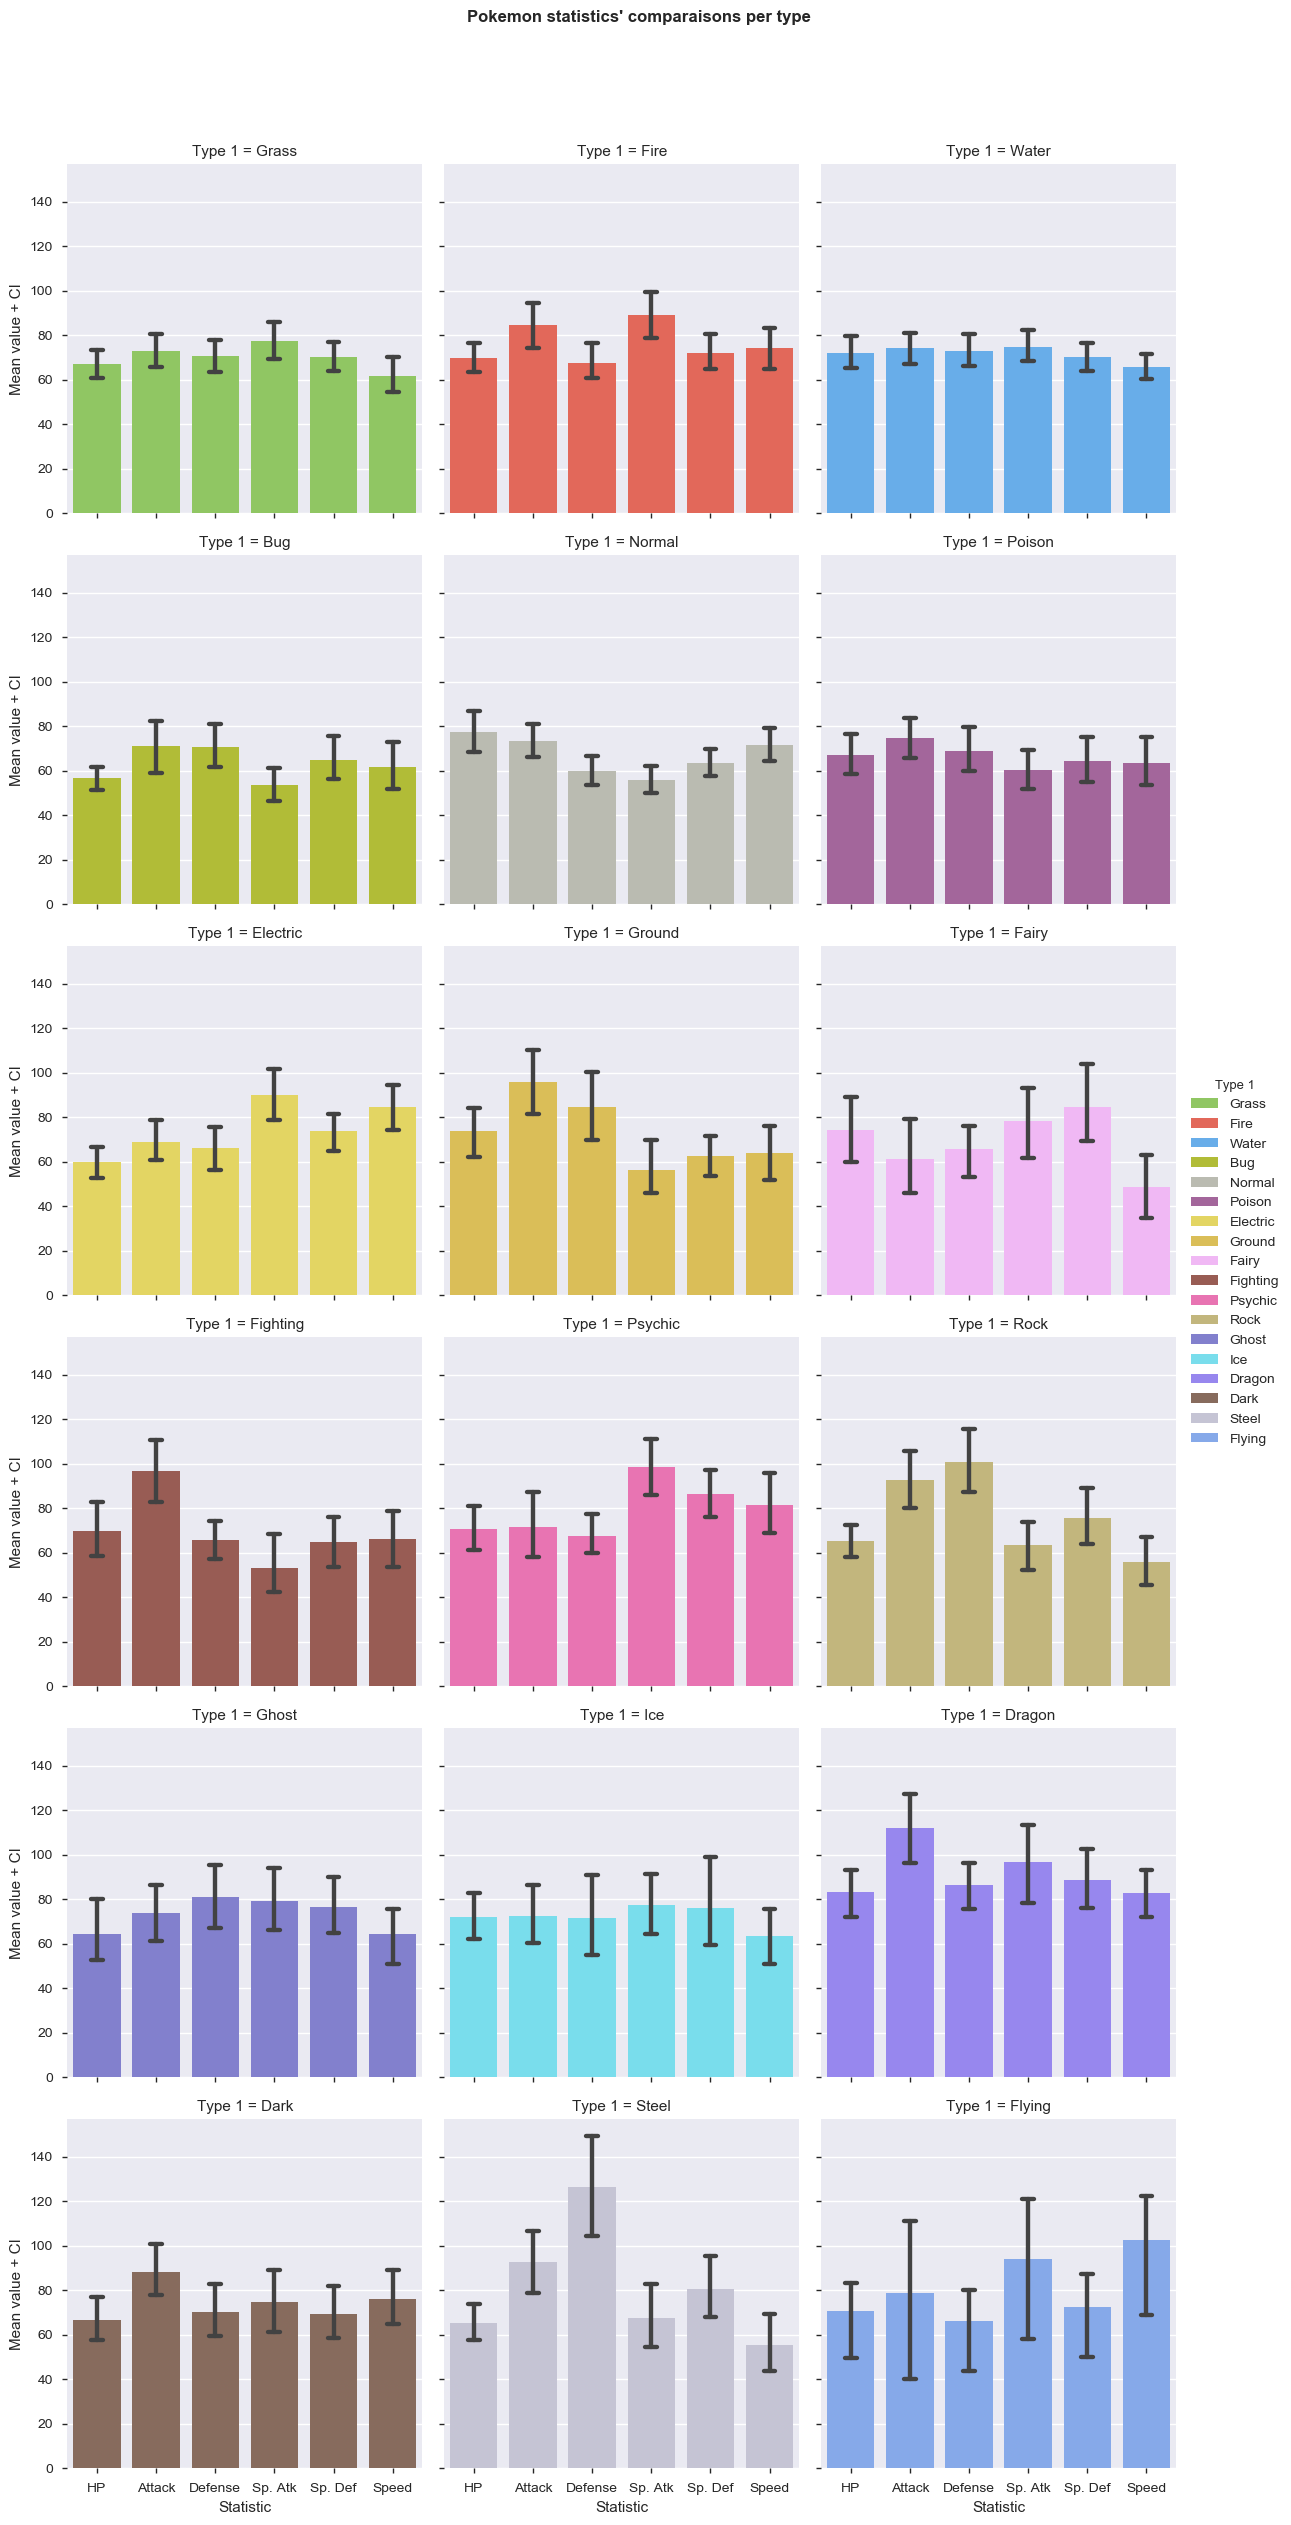

In [17]:
g = (sns.FacetGrid(data=melted_df, 
                   col='Type 1', 
                   hue='Type 1',
                   col_wrap=3, 
                   height=4, 
                   palette=pokemon_colors)
        .map(sns.barplot, 'statistic', 'value', ci=99, capsize=0.2)
        .set_axis_labels('Statistic', 'Mean value + CI')
        .add_legend()
        .fig
        .suptitle("Pokemon statistics' comparaisons per type", 
                  weight='bold', y=1.05))

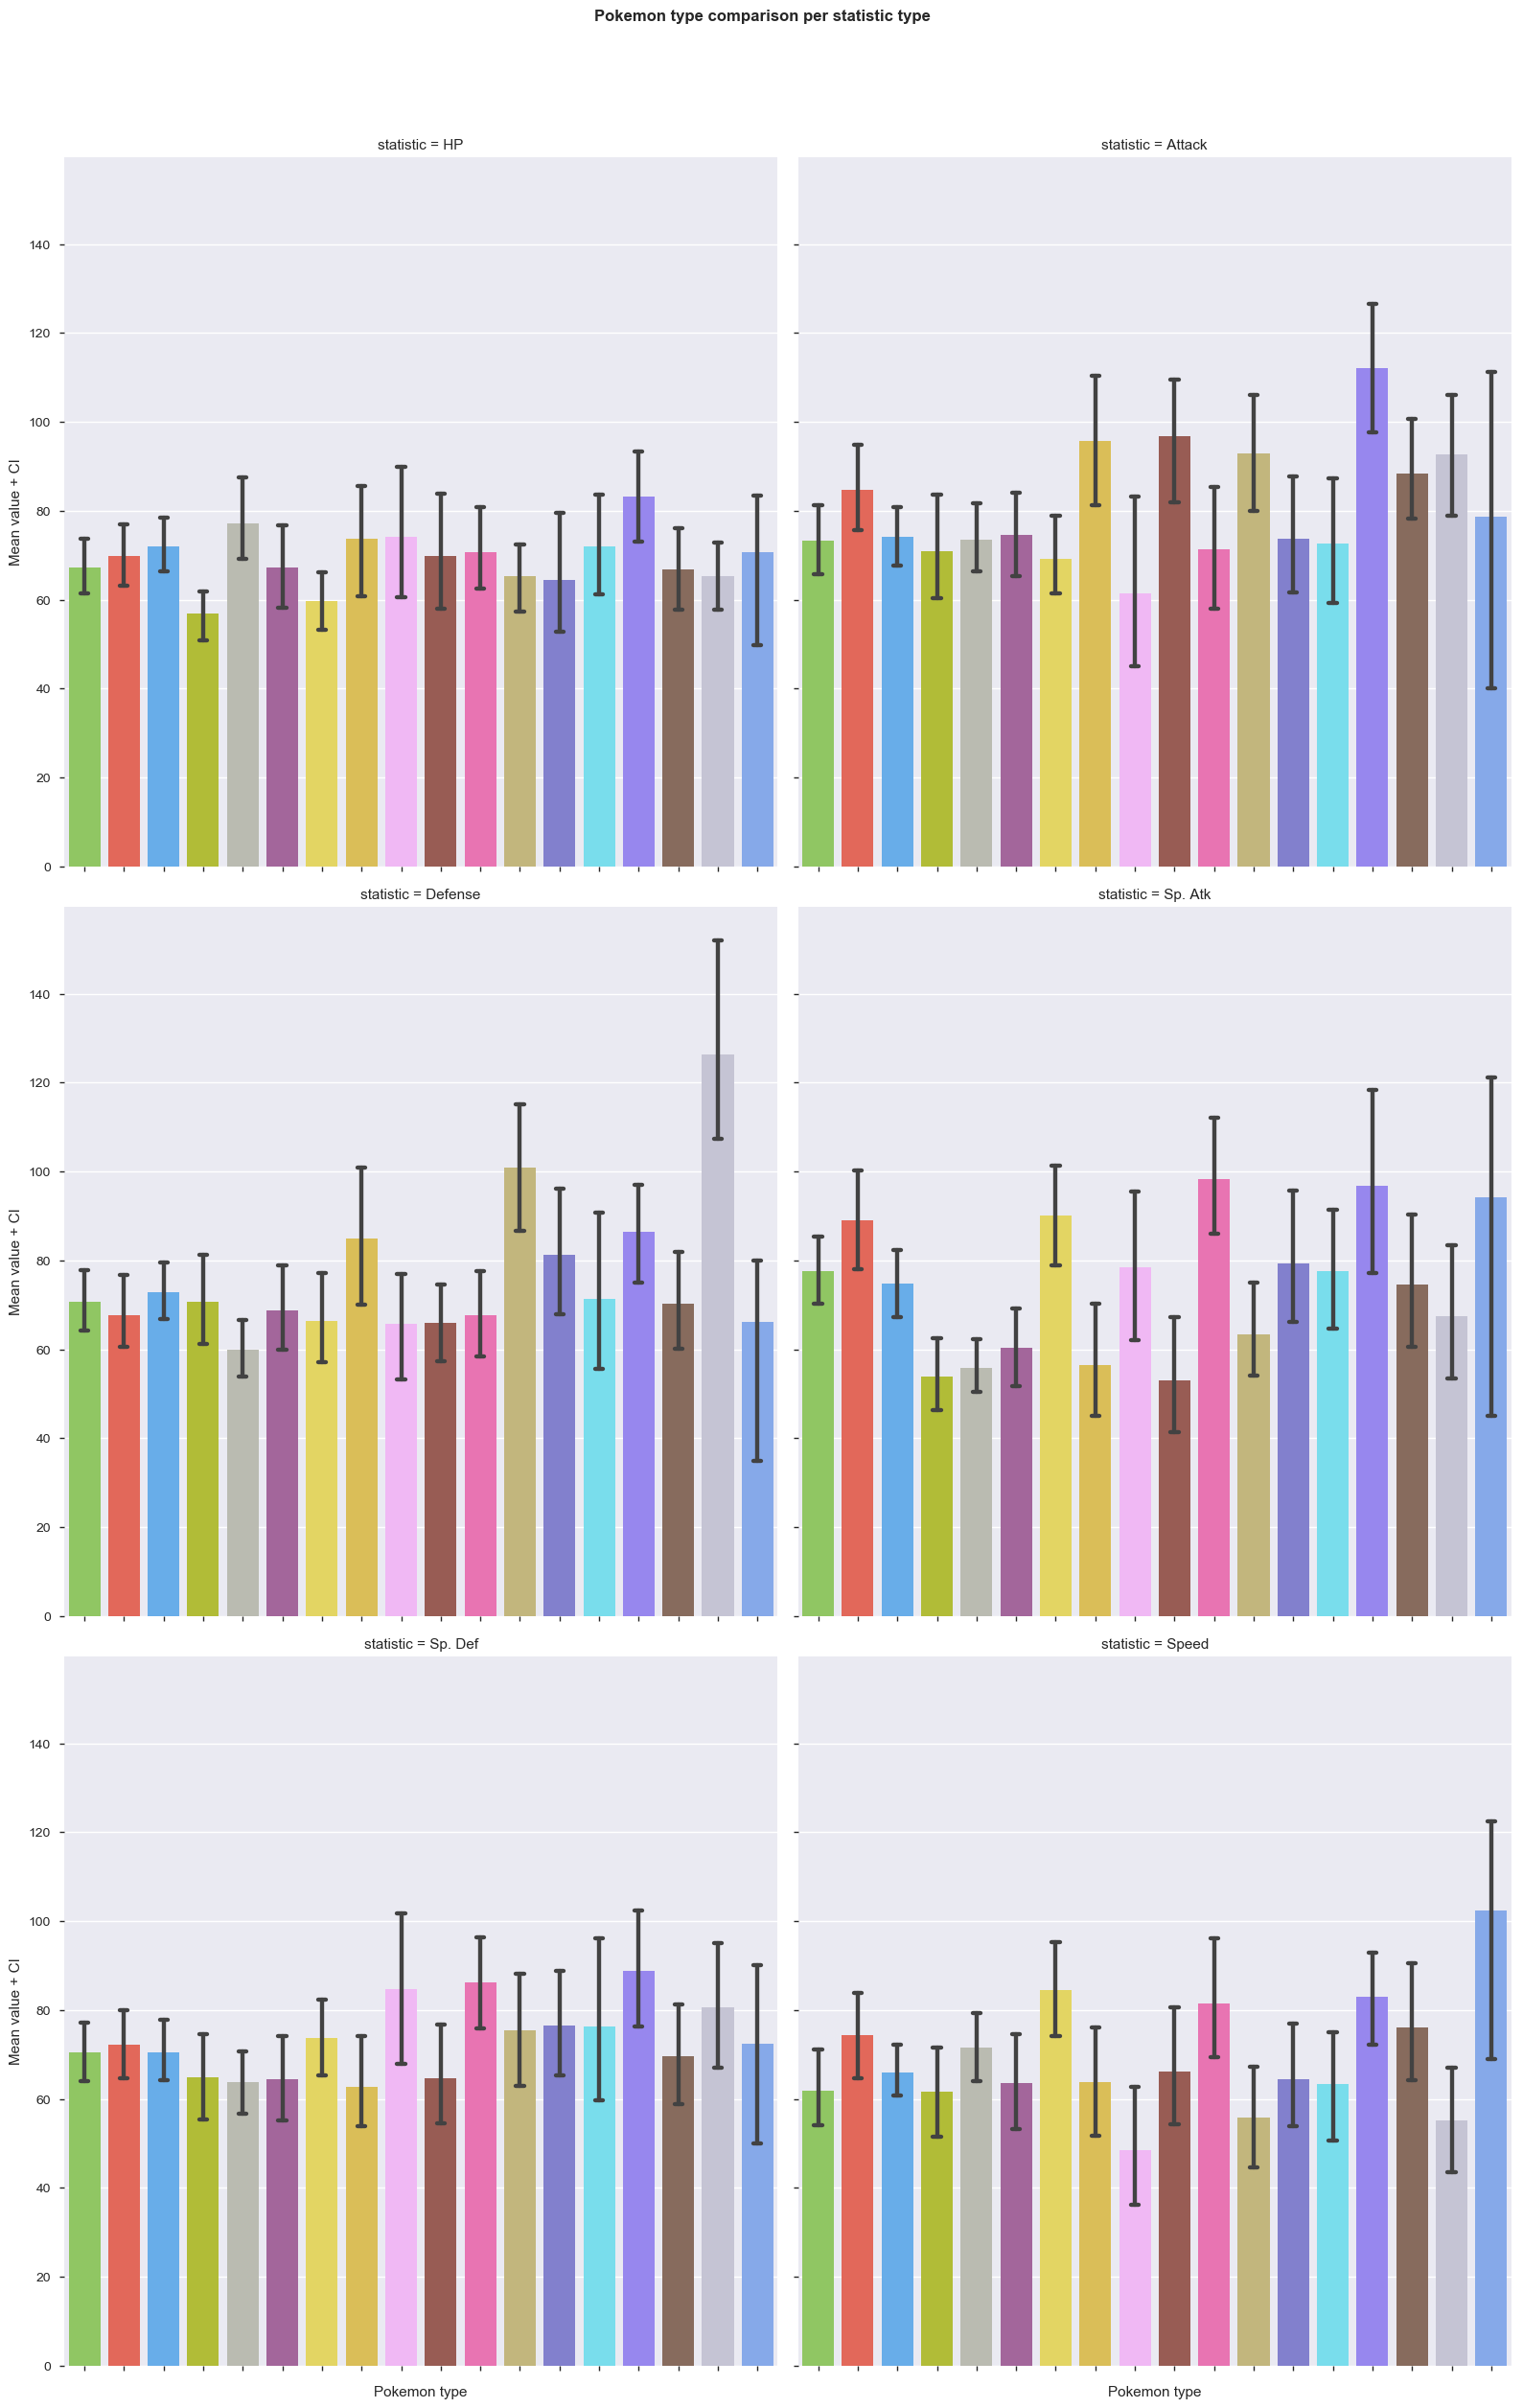

In [18]:
bg = (sns.FacetGrid(data=melted_df, 
                   col='statistic', 
                   col_wrap=2, 
                   size=8)
        .map(sns.barplot, 'Type 1', 'value', palette=pokemon_colors, ci=99, capsize=0.2)
        .set_axis_labels('Pokemon type', 'Mean value + CI')
        .set(xticklabels=[])
        .fig
        .suptitle('Pokemon type comparison per statistic type', 
                  weight='bold', y=1.05))

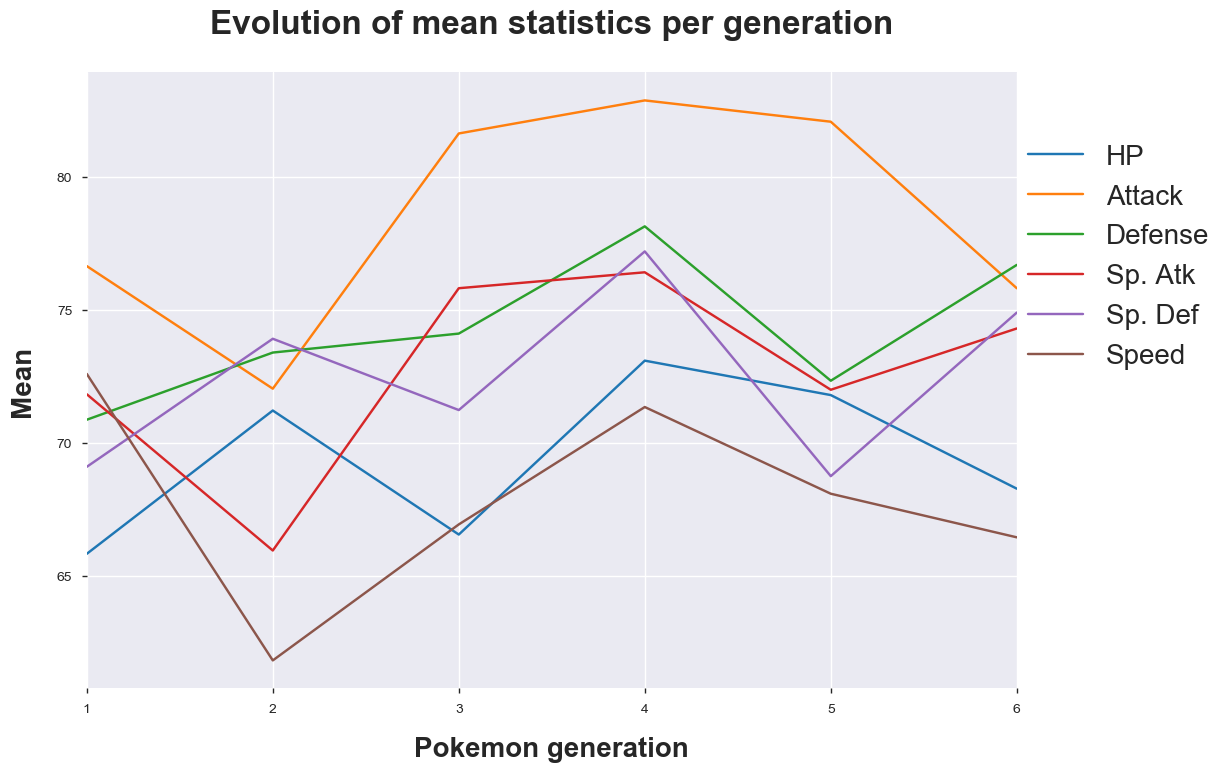

In [26]:
df = (pokemon_df.groupby('Generation')
                .mean()
                .drop(['#', 'Total', 'Legendary'], axis=1)
                .reset_index()
                .pipe(pd.melt, id_vars=['Generation'], 
                                var_name='statistic')
                .assign(unit=lambda df: 0))


fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.tsplot(time='Generation', condition='statistic', 
           value='value', unit='unit', ax=ax,
           data=df)




ax.set_xlabel('Pokemon generation', weight='bold', size='20', labelpad=15)
ax.set_ylabel('Mean', weight='bold', size='20', labelpad=15)
ax.set_title('Evolution of mean statistics per generation',  size='24', weight='bold', y=1.05)
ax.legend(loc=(1, 0.5), prop={'size': 20})